In [1]:
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

df = pd.read_csv('../data/heart.csv', encoding='utf-8-sig')

# pandas profiling
print(df.head(5))
report = df.profile_report()
report

# styling
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

matplotlib.pyplot.style.use('ggplot')

# visualization for categorical feature
def ctg_dist(df, cols, hue=None, rows=3, columns=3):
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                      data=df,
                      palette=cust_palt,
                      hue=hue,
                      ax=j,
                      order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)

        total = float(len(df[i]))
        j.set_title(f'{str(i).capitalize()} Distribution')

        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                   height + 2,
                   '{:1.2f}%'.format((height / total) * 100),
                   ha='center')

        plt.tight_layout()

df['target'] = df['target'].map({0:'no_disease', 1:'has_disease'})
        
# feature
categorical = [col for col in df.loc[:, df.nunique() <= 10]]
continuous = [col for col in df.loc[:, df.nunique() >= 10]]

print(categorical[0])
print(continuous[0])

ctg_dist(df, categorical)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
sex
age


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

<AxesSubplot:title={'center':'Chol'}, xlabel='chol'>

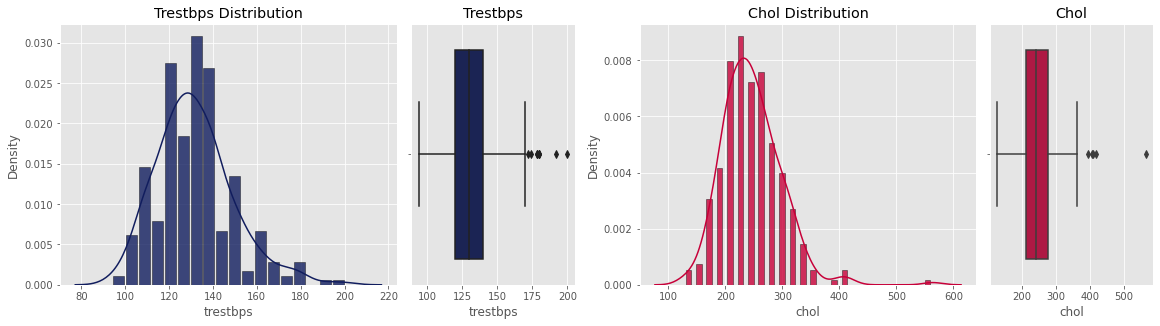

In [2]:
# visualization for numeric feature
fig = plt.figure(constrained_layout=True, figsize=(16, 12))

# when you divide area irregularly
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')
sns.distplot(df[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Trestbps')
sns.boxplot(df[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')
sns.distplot(df[continuous[2]],
                 hist_kws={
                 'rwidth': 0.55,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')
sns.boxplot(df[continuous[2]], orient='v', color=cust_palt[1])

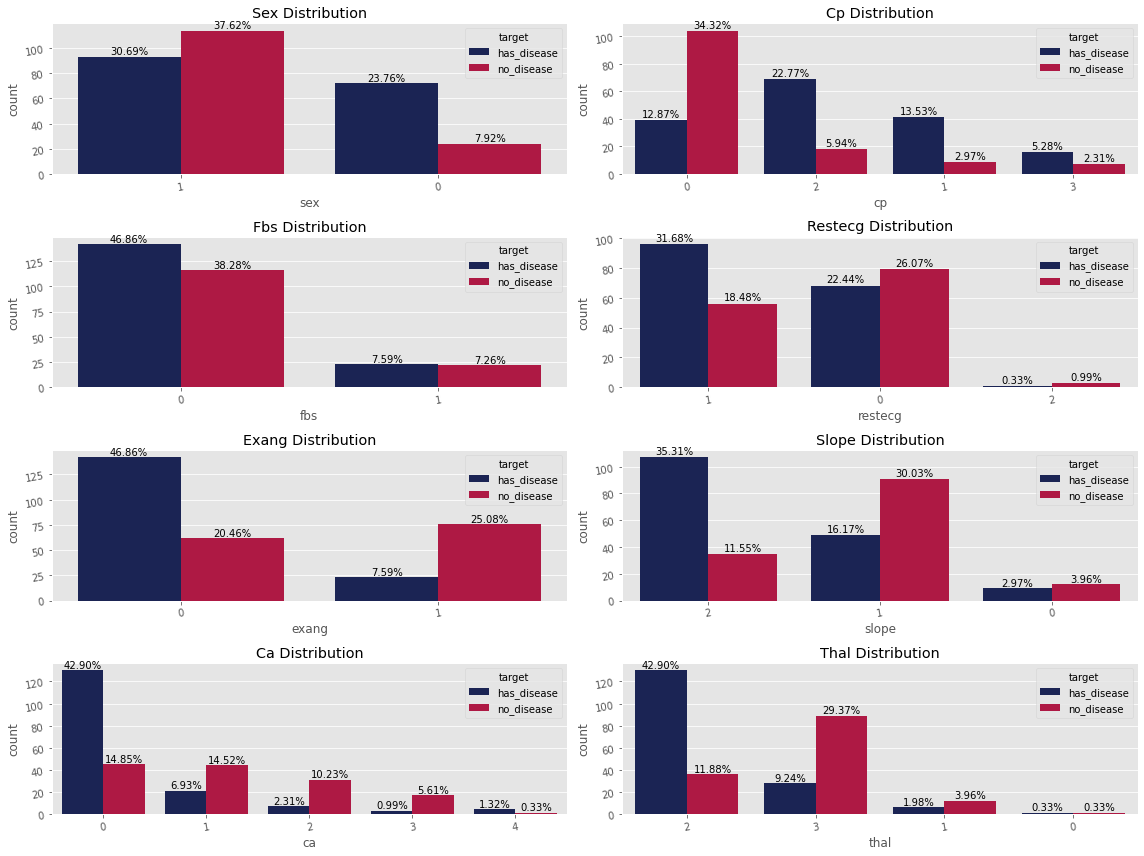

In [3]:
# bivariate analysis
# categorical feature vs target
ctg_dist(df, categorical[:-1], 'target', 4, 2)

<AxesSubplot:title={'center':'cholesterol Distribution'}, xlabel='target', ylabel='chol'>

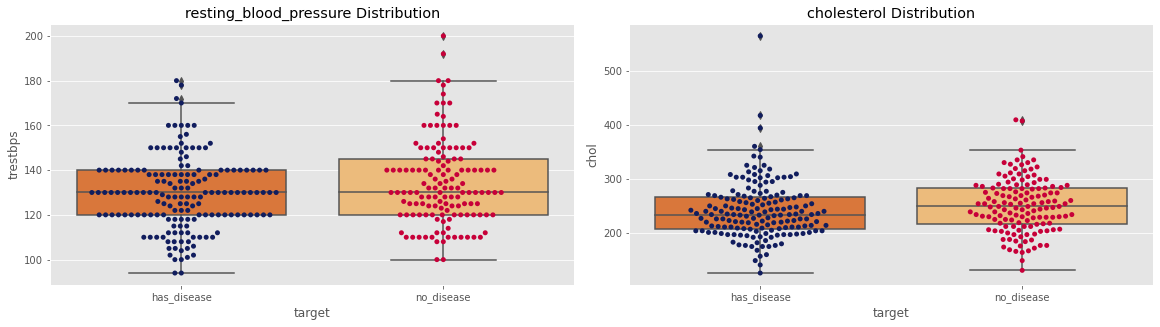

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('resting_blood_pressure Distribution')
sns.boxplot(x='target',
                    y='trestbps',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='target',
                    y='trestbps',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])
ax2.set_title('cholesterol Distribution')
sns.boxplot(x='target',
                    y='chol',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='target',
                    y='chol',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax2)

<Figure size 1152x720 with 0 Axes>

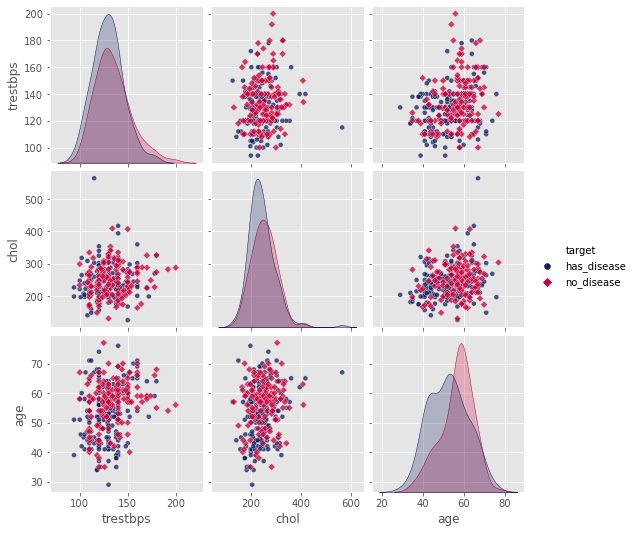

In [5]:
# multivariate analysis
plt.figure(figsize=(16, 10))
sns.pairplot(df[['trestbps', 'chol', 'age', 'target']], hue='target', palette=[
    '#111d5e', '#c70039'
],
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()